# Estimation of the magnetic amplitude from total-field anomaly data using equivalent layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import pandas as pd

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from fatiando.gridder import regular
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf

C:\Users\bes064\AppData\Local\Continuum\anaconda2\lib\site-packages\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
C:\Users\bes064\AppData\Local\Continuum\anaconda2\lib\site-packages\fatiando\vis\myv.py:51: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


In [2]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import mag_sphere_functions as msf

# Input

In [3]:
model_dir = 'data/model.pickle'
data_dir = 'data/flightlines_grid_2100pts_100km2_-150m/data.pickle'

### Observation points and observed data

In [4]:
with open(data_dir) as w:
        data = pickle.load(w)

In [5]:
# observed data and observation points
dobs = data['tfa_obs']
xp = data['grid'][0]
yp = data['grid'][1]
zp = data['grid'][2]
N = data['grid'][3]

In [6]:
# main field
inc = data['main_field'][0]
dec = data['main_field'][1]

# daiana
incs = 65.
decs = -40.5

# clive
#incs = -43.
#decs = -3.

# andré
#incs = -59.
#decs = -114.5

In [7]:
h = np.zeros(xp.size) + 190.  # layer depth
A_tf = msf.sm_tf_sphere(xp, yp, zp, xp, yp, h, inc, dec, incs, decs)

In [8]:
I = np.identity(xp.size)
f0 = np.trace(np.dot(A_tf.T, A_tf))/xp.size
u0 = 0.001

In [9]:
vp = np.linalg.solve(np.dot(A_tf.T,A_tf) + u0*f0*I,np.dot(A_tf.T,dobs))

In [10]:
tf = np.dot(A_tf,vp)

In [11]:
z_up = -1000.

A_up = msf.sm_tf_sphere(xp, yp, zp + z_up, xp, yp, h, inc, dec, incs, decs)
upward_tfa = np.dot(A_up, vp)

In [12]:
mypath = 'eqlayer/direction_inc%d_dec%d_h%dm' % (incs, decs, h[0])
if not os.path.isdir(mypath):
   os.makedirs(mypath)

C:\Users\bes064\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:546: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


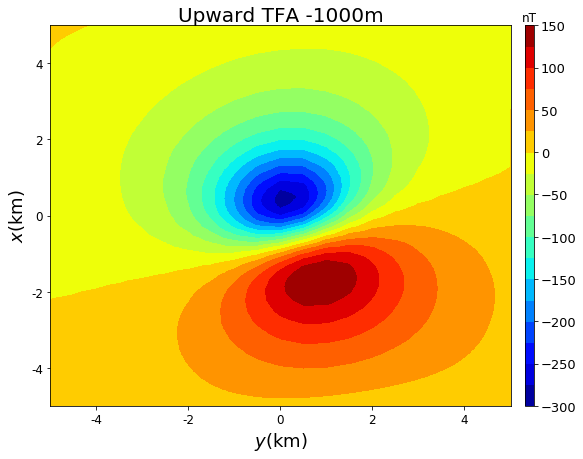

In [13]:
plt.figure(figsize=(10,7))
plt.title('Upward TFA %dm' % (z_up), fontsize=20)
plt.tricontourf(yp, xp, upward_tfa, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
#plt.savefig(mypath+'diorama_tfa_upward_%dm_inc%d_dec%d.png' % (z_up, incs, decs), dpi=300)
plt.show()
#img(filename=mypath+'diorama_tfa_upward_%dm_inc%d_dec%d.png' % (z_up, incs, decs), width=1000, height=1200)

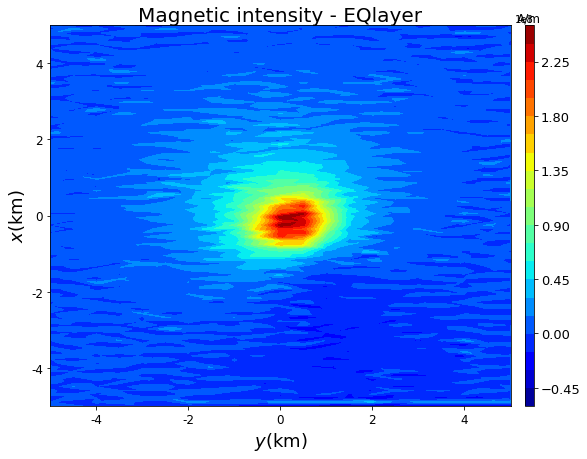

In [14]:
plt.figure(figsize=(10,7))
plt.title('Magnetic intensity - EQlayer', fontsize=20)
plt.tricontourf(yp, xp, vp, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('A/m')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
#plt.savefig('momentum_mag_intensity_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()
#img(filename='momentum_mag_intensity_inc%d_dec%d.png' % (incs, decs), width=1000, height=1200)

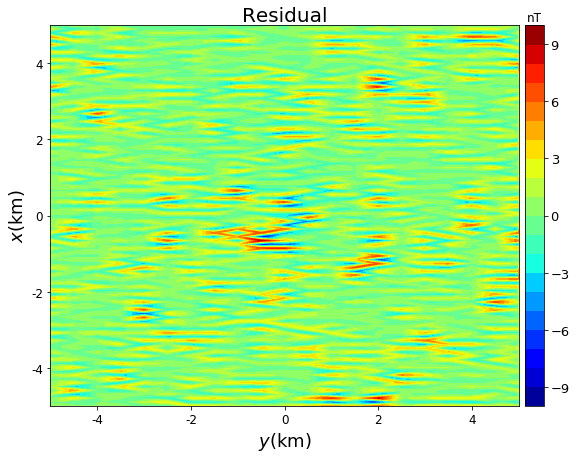

In [15]:
plt.figure(figsize=(10,7))
plt.title('Residual', fontsize=20)
plt.tricontourf(yp, xp, dobs - tf, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
#plt.savefig(mypath+'diorama_eqlayer_residual_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()
#img(filename=mypath+'diorama_eqlayer_residual_inc%d_dec%d.png' % (incs, decs), width=1600, height=400)

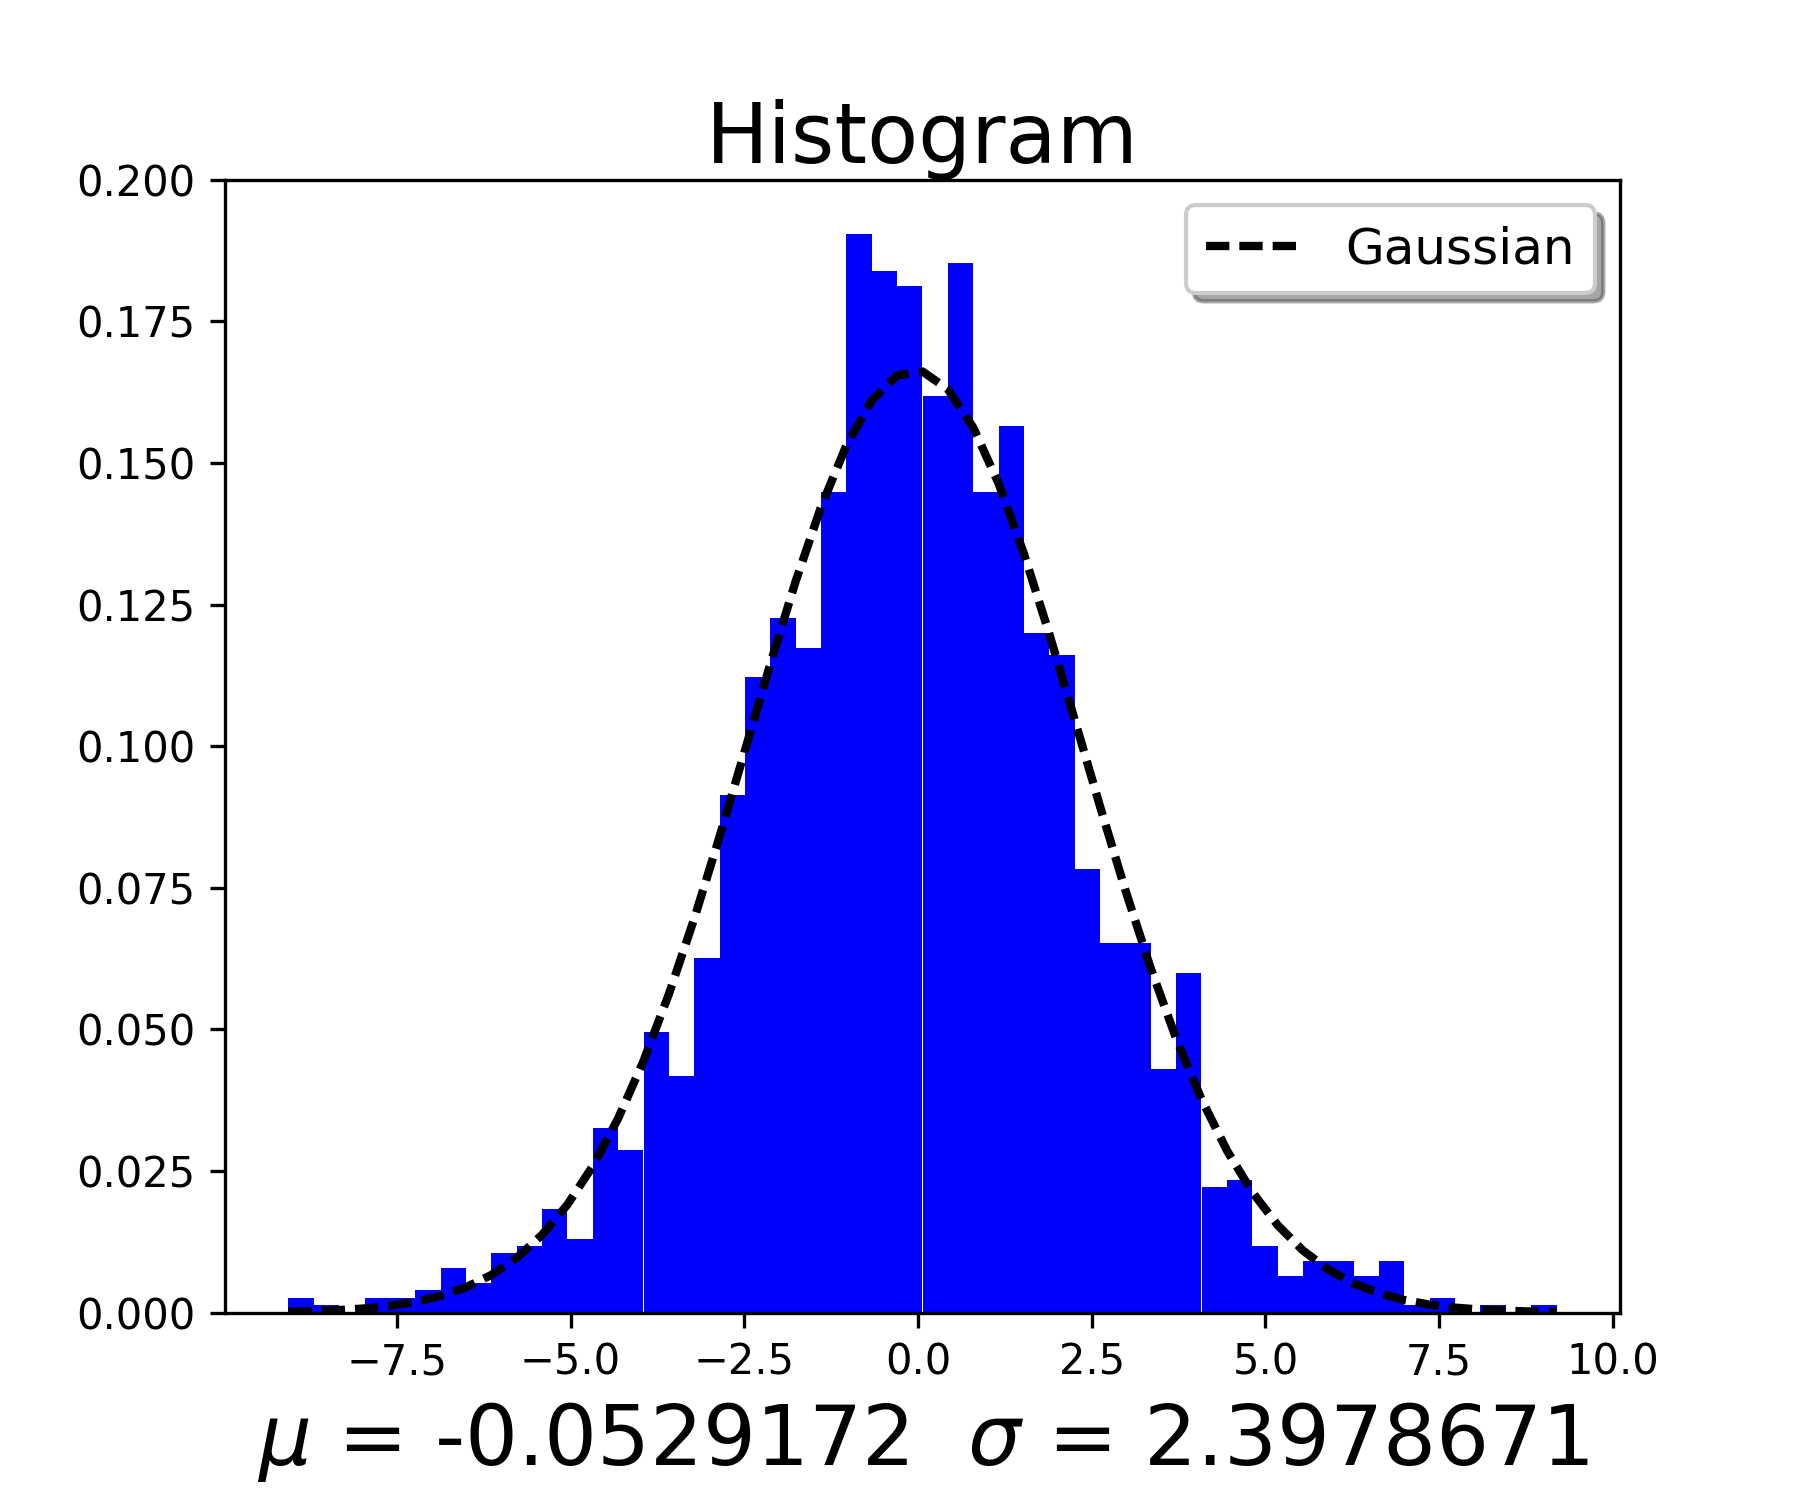

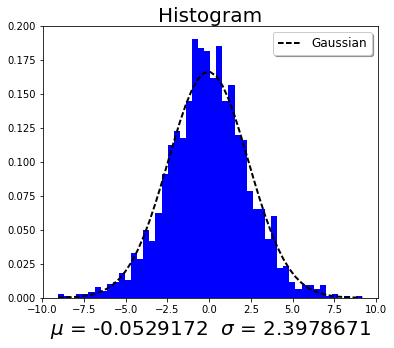

In [16]:
mean = np.mean(dobs - tf)
std = np.std(dobs - tf)
plt.figure(figsize=(6,5))
plt.title('Histogram', fontsize = 20)
plt.xlabel('$\mu$ = %.7f  $\sigma$ = %.7f' % (mean, std), fontsize=20)
nbins=50
n, bins, patches = plt.hist(dobs - tf,bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=2., label='Gaussian')
#plt.xticks(np.linspace(-100*std, 100*std, 5),)
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'diorama_tfa_hist_inc%d_dec%d.png' % (incs, decs), dpi=300)
#plt.show()

img(filename=mypath+'diorama_tfa_hist_inc%d_dec%d.png' % (incs, decs), width=400, height=400)

In [17]:
eqlayer = dict()

In [18]:
eqlayer['layer_depth'] = h[0]
eqlayer['regularization'] = u0
eqlayer['layer_parameters'] = vp
eqlayer['upward'] = upward_tfa
#eqlayer['amf'] = mag_amp
eqlayer['x'] = xp
eqlayer['y'] = yp
eqlayer['z'] = zp + z_up

In [19]:
file_name = mypath+'/eqlayer_depth%dm.pickle' % (h[0])
with open(file_name, 'w') as f:
    pickle.dump(eqlayer, f)